In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib
import sys

import glob

### 참고코드

In [2]:
##################### 히스토그램 기반 유사도 ###########################

import cv2
import numpy as np
import seaborn as sns
import pandas as pd

def compare_images(img_list):
    # 이미지 불러오기
    
    imgs = []
    hists = []
    similarity_list = []
        
    for img in img_list : 
    
        imgs.append(img)
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        hists.append(hist)
        

    for query in hists : 
        
        similaritys = []
        
        for hist in hists :
        
            similarity = cv2.compareHist(query, hist, cv2.HISTCMP_BHATTACHARYYA)
            similaritys.append(similarity)
            
        similarity_list.append(similaritys)      
        
    return similarity_list, imgs
        
        
similarity_list, imgs = compare_images(he_dataset)    



plt.figure(figsize=(10,8))


for i, img in enumerate(imgs) :
    

    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img, cmap='gray')
    
plt.figure(figsize=(9.7,4))
sns.heatmap(pd.DataFrame(similarity_list), annot=True, cbar=False, cmap="Greens")
plt.show()

print((pd.DataFrame(similarity_list).sum().sum()) / 2)

NameError: name 'he_dataset' is not defined

In [33]:
li = glob.glob('/dshome/ddualab/seonjin2/denosing/dataset/BUSI/*')

img_list = []

for i in li :
    
    img = glob.glob(i + '/*).png')
    img_list.extend(img)
    

origin_dataset = []

for img in img_list:
    
  img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

  resized_img = cv2.resize(img, (256, 256))
  origin_dataset.append(resized_img)

origin_dataset = np.array(origin_dataset)


origin_dataset = origin_dataset.reshape(origin_dataset.shape[0], -1)

x = origin_dataset.mean(axis=1)
x = np.float32(x)    
len(x)

780

In [34]:
li = glob.glob('/dshome/ddualab/seonjin2/denosing/dataset/Dataset B/original')

img_list = []

for i in li :
    
    img = glob.glob(i + '/*.png')
    img_list.extend(img)
    
origin_dataset = []

for img in img_list:
    
  img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

  resized_img = cv2.resize(img, (256, 256))
  origin_dataset.append(resized_img)

origin_dataset = np.array(origin_dataset)


origin_dataset = origin_dataset.reshape(origin_dataset.shape[0], -1)

y = origin_dataset.mean(axis=1)
y = np.float32(y)
len(y)

163

In [35]:
li = glob.glob('/dshome/ddualab/seonjin2/denosing/dataset/Miccai BUV/*/*')

img_list = []

for i in li :
    
    img = glob.glob(i + '/*.png')
    img_list.extend(img)
    
    
origin_dataset = []

for img in img_list:
    
  img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

  resized_img = cv2.resize(img, (256, 256))
  origin_dataset.append(resized_img)

origin_dataset = np.array(origin_dataset)


origin_dataset = origin_dataset.reshape(origin_dataset.shape[0], -1)

z = origin_dataset.mean(axis=1)
z = np.float32(z)
len(z)

1000

In [36]:
x_hist = cv2.calcHist([x], [0], None, [256], [0, 256])
y_hist = cv2.calcHist([y], [0], None, [256], [0, 256])
z_hist = cv2.calcHist([z], [0], None, [256], [0, 256])

In [37]:
cv2.compareHist(x_hist, y_hist, cv2.HISTCMP_CORREL), cv2.compareHist(x_hist, z_hist, cv2.HISTCMP_CORREL),  cv2.compareHist(y_hist, z_hist, cv2.HISTCMP_CORREL)

(0.531070587335413, 0.8324456450243136, 0.3432001153863376)

### 적용

In [38]:
li = glob.glob('/dshome/ddualab/seonjin2/denosing/dataset/BUSI/*')

img_list = []

for i in li :
    
    img = glob.glob(i + '/*).png')
    img_list.extend(img)


norm_dataset = []

for img in img_list:
  img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  resized_img = cv2.resize(img, (256, 256))
  norm_img = cv2.equalizeHist(resized_img)
  norm_dataset.append(norm_img)

norm_dataset = np.array(norm_dataset)

norm_dataset = norm_dataset.reshape(norm_dataset.shape[0], -1)

x_a = norm_dataset.mean(axis=1)
x_a = np.float32(x_a)
len(x_a)

780

In [39]:
li = glob.glob('/dshome/ddualab/seonjin2/denosing/dataset/Dataset B/original')

img_list = []

for i in li :
    
    img = glob.glob(i + '/*.png')
    img_list.extend(img)
    
    
norm_dataset = []

for img in img_list:
  img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  resized_img = cv2.resize(img, (256, 256))
  norm_img = cv2.equalizeHist(resized_img)
  norm_dataset.append(norm_img)

norm_dataset = np.array(norm_dataset)

norm_dataset = norm_dataset.reshape(norm_dataset.shape[0], -1)

y_a = norm_dataset.mean(axis=1)
y_a = np.float32(y_a)
len(y_a)

163

In [40]:
li = glob.glob('/dshome/ddualab/seonjin2/denosing/dataset/Miccai BUV/*/*')

img_list = []

for i in li :
    
    img = glob.glob(i + '/*.png')
    img_list.extend(img)

norm_dataset = []

for img in img_list:
  img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  resized_img = cv2.resize(img, (256, 256))
  norm_img = cv2.equalizeHist(resized_img)
  norm_dataset.append(norm_img)

norm_dataset = np.array(norm_dataset)

norm_dataset = norm_dataset.reshape(norm_dataset.shape[0], -1)

z_a = norm_dataset.mean(axis=1)
z_a = np.float32(z_a)
len(z_a)

1000

In [41]:
x_hist = cv2.calcHist([x_a], [0], None, [256], [0, 256])
y_hist = cv2.calcHist([y_a], [0], None, [256], [0, 256])
z_hist = cv2.calcHist([z_a], [0], None, [256], [0, 256])

cv2.compareHist(x_hist, y_hist, cv2.HISTCMP_CORREL), cv2.compareHist(x_hist, z_hist, cv2.HISTCMP_CORREL),  cv2.compareHist(y_hist, z_hist, cv2.HISTCMP_CORREL)

(0.9776092386086643, 0.9773060399943715, 0.9907270731800454)

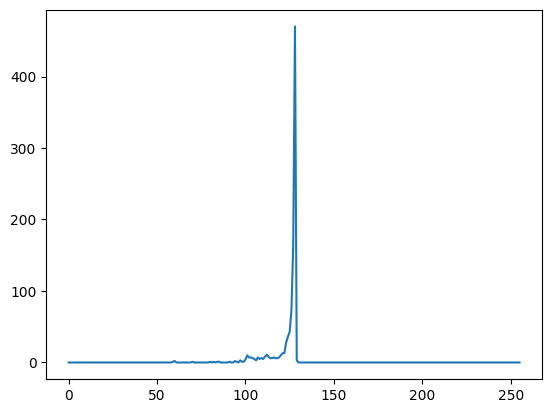

In [32]:
plt.plot(z_hist)